# Section 4.2.

# This notebook represent results of IF, LOF and OCSVM after dimension reduction by FPCA (after a filtering) on the thirteen real-world datasets. 

### No csv are uploaded here. Computation time is few for results in section 4.2. 

### The notebook is organized as follows : we import datasets, then we plots the thirteen ROC curves (and AUC) for each FIF setups.

# You can run the entire notebook (30 sec approximatively)

## Importing libraries :

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from time import *
from multiprocessing import Pool
from sklearn.metrics import auc, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

## Importing datasets :

In [2]:

os.chdir('../../Datasets')

chinatown = pd.read_csv('China_Train.csv', header = None)
chinatown2 = pd.read_csv('China_Test.csv', header = None)


X1_train = np.array(chinatown, dtype = float)[:,1:]
X1_test = np.array(chinatown2, dtype = float)[:,1:]
y1_train = np.array(chinatown, dtype=float)[:,0]
y1_test = np.array(chinatown2, dtype=float)[:,0]

coffee = pd.read_csv('Coffee_Train.csv', header = None)
coffee2 = pd.read_csv('Coffee_Test.csv', header = None)


X2_train = np.array(coffee, dtype = float)[:,1:]
X2_test = np.array(coffee2, dtype = float)[:,1:]
y2_train = np.array(coffee, dtype=float)[:,0]
y2_test = np.array(coffee2, dtype=float)[:,0]

ecgfivedays = pd.read_csv('ECGFiveDays_Train.csv', header = None)
ecgfivedays2 = pd.read_csv('ECGFiveDays_Test.csv', header = None)


X3_train = np.array(ecgfivedays, dtype = float)[:,1:]
X3_test = np.array(ecgfivedays2, dtype = float)[:,1:]
y3_train = np.array(ecgfivedays, dtype=float)[:,0]
y3_test = np.array(ecgfivedays2, dtype=float)[:,0]

ecg200 = pd.read_csv('ECG200_Train.csv', header = None)
ecg200_2 = pd.read_csv('ECG200_Test.csv', header = None)


X4_train = np.array(ecg200, dtype = float)[:,1:]
X4_test = np.array(ecg200_2, dtype = float)[:,1:]
y4_train = np.array(ecg200, dtype=float)[:,0]
y4_test = np.array(ecg200_2, dtype=float)[:,0]

handoutlines = pd.read_csv('Handoutlines_Train.csv', header = None)
handoutlines_2 = pd.read_csv('Handoutlines_Test.csv', header = None)


X5_train = np.array(handoutlines, dtype = float)[:,1:]
X5_test = np.array(handoutlines_2, dtype = float)[:,1:]
y5_train = np.array(handoutlines, dtype=float)[:,0]
y5_test = np.array(handoutlines_2, dtype=float)[:,0]

SonyRobotAI1 = pd.read_csv('SonyRobotAI1_Train.csv', header = None)
SonyRobotAI1_2 = pd.read_csv('SonyRobotAI1_Test.csv', header = None)


X6_train = np.array(SonyRobotAI1, dtype = float)[:,1:]
X6_test = np.array(SonyRobotAI1_2, dtype = float)[:,1:]
y6_train = np.array(SonyRobotAI1, dtype=float)[:,0]
y6_test = np.array(SonyRobotAI1_2, dtype=float)[:,0]


SonyRobotAI2 = pd.read_csv('SonyRobotAI2_Train.csv', header = None)
SonyRobotAI2_2 = pd.read_csv('SonyRobotAI2_Test.csv', header = None)


X7_train = np.array(SonyRobotAI2, dtype = float)[:,1:]
X7_test = np.array(SonyRobotAI2_2, dtype = float)[:,1:]
y7_train = np.array(SonyRobotAI2, dtype=float)[:,0]
y7_test = np.array(SonyRobotAI2_2, dtype=float)[:,0]


starlightcurves = pd.read_csv('StarLightCurves_Train.csv', header = None)
starlightcurves2  = pd.read_csv('StarLightCurves_Test1.csv', header = None)
starlightcurves3  = pd.read_csv('StarLightCurves_Test2.csv', header = None)


X8_train = np.array(starlightcurves, dtype = float)[:,1:]
y8_train = np.array(starlightcurves, dtype=float)[:,0]

X8_test1 = np.array(starlightcurves2, dtype = float)[:,1:]
X8_test2 = np.array(starlightcurves3, dtype = float)[:,1:]
X8_test = np.concatenate((X8_test1,X8_test2), axis = 0)
y8_test1 = np.array(starlightcurves2, dtype=float)[:,0]
y8_test2 = np.array(starlightcurves3, dtype=float)[:,0]
y8_test = np.concatenate((y8_test1,y8_test2))


twoleadECG = pd.read_csv('TwoLeadECG_Train.csv', header = None)
twoleadECG2  = pd.read_csv('TwoLeadECG_Test.csv', header = None)


X9_train = np.array(twoleadECG , dtype = float)[:,1:]
X9_test = np.array(twoleadECG2 , dtype = float)[:,1:]
y9_train = np.array(twoleadECG , dtype=float)[:,0]
y9_test = np.array(twoleadECG2 , dtype=float)[:,0]

yoga = pd.read_csv('Yoga_Train.csv', header = None)
yoga2  = pd.read_csv('Yoga_Test.csv', header = None)


X10_train = np.array(yoga , dtype = float)[:,1:]
X10_test = np.array(yoga2 , dtype = float)[:,1:]
y10_train = np.array(yoga , dtype=float)[:,0]
y10_test = np.array(yoga2 , dtype=float)[:,0]

y10_train[np.where(y10_train == 1)[0]] = -1
y10_train[np.where(y10_train == 2)[0]] = 1


EOGHorizontal = pd.read_csv('EOGHorizontal_Train.csv', header = None)
EOGHorizontal2  = pd.read_csv('EOGHorizontal_Test.csv', header = None)


X11_train = np.array(EOGHorizontal , dtype = float)[:,1:]
X11_test = np.array(EOGHorizontal2 , dtype = float)[:,1:]
y11_train = np.array(EOGHorizontal , dtype=float)[:,0]
y11_test = np.array(EOGHorizontal2 , dtype=float)[:,0]



CinECGTorso = pd.read_csv('CinECGTorso_Train.csv', header = None)
CinECGTorso2  = pd.read_csv('CinECGTorso_Test.csv', header = None)


X12_train = np.array(CinECGTorso , dtype = float)[:,1:]
X12_test = np.array(CinECGTorso2 , dtype = float)[:,1:]
y12_train = np.array(CinECGTorso , dtype=float)[:,0]
y12_test = np.array(CinECGTorso2 , dtype=float)[:,0]

ECG5000 = pd.read_csv('ECG5000_Train.csv', header = None)
ECG50002  = pd.read_csv('ECG5000_Test.csv', header = None)


X13_train = np.array(ECG5000 , dtype = float)[:,1:]
X13_test = np.array(ECG50002 , dtype = float)[:,1:]
y13_train = np.array(ECG5000 , dtype=float)[:,0]
y13_test = np.array(ECG50002 , dtype=float)[:,0]


l = [[X1_train, X1_test, y1_test], [X2_train, X2_test, y2_test], [X3_train, X3_test, y3_test],
	   [X4_train, X4_test, y4_test], [X5_train, X5_test, y5_test], [X6_train, X6_test, y6_test],
	   [X7_train, X7_test, y7_test], [X8_train, X8_test, y8_test], [X9_train, X9_test, y9_test],
	   [X10_train, X10_test, y10_test], [X11_train, X11_test, y11_test], [X12_train, X12_test, y12_test],
	   [X13_train, X13_test, y13_test]]



# FPCA :

In [3]:
def Bench_FPCA1(l):
    np.random.seed(42)
    A_raw = pywt.wavedec(np.array(l[0]),
                     'haar',
                     mode="sym")
    A2_raw = pywt.wavedec(np.array(l[1]),
                     'haar',
                     mode="sym")
    A = np.hstack(A_raw)
    A2 = np.hstack(A2_raw)
    K = 10
    X_tilde = 1. / np.sqrt(l[0].shape[0]) * A
    X2_tilde = 1. / np.sqrt(l[1].shape[0]) * A2
    my_pca = PCA(n_components = K,
                 whiten = True # For having projections with unit variance
                )
    X_fpca = my_pca.fit_transform(X_tilde) # Matrix of coefficients
    X2_fpca = my_pca.fit_transform(X2_tilde) 
    IF = IsolationForest(n_estimators=100, max_samples='auto',behaviour='new', contamination='auto')
    IF.fit(X_fpca)
    predict_IF = IF.decision_function(X2_fpca)
    LOF = LocalOutlierFactor(n_neighbors=20 ,contamination='auto', novelty = True)
    LOF.fit(X_fpca)
    predict_LOF = LOF.decision_function(X2_fpca)
    OC = OneClassSVM(kernel='rbf',gamma='scale')
    OC.fit(X_fpca)
    predict_OCSVM = OC.decision_function(X2_fpca)
    return predict_IF, predict_LOF, predict_OCSVM

if __name__ == '__main__': # excute on main process only
    #with Pool(4) as p:
    p = Pool(13)
    result_FPCA = p.map(Bench_FPCA1, l) 



## Function to plot the thirteen Roc Curves :

In [4]:
def plotroc(y,score):
    y = y
    a , b, _ = roc_curve(y, score)
    auc = roc_auc_score(y, score)
    plt.plot(a, b, label=' AUC %.2f' % auc )
    #plt.xlabel('FP')
    #plt.ylabel('TP')
    plt.legend(loc='lower right')   

# Isolation Forest

Text(0.5, 1.0, 'ECG5000')

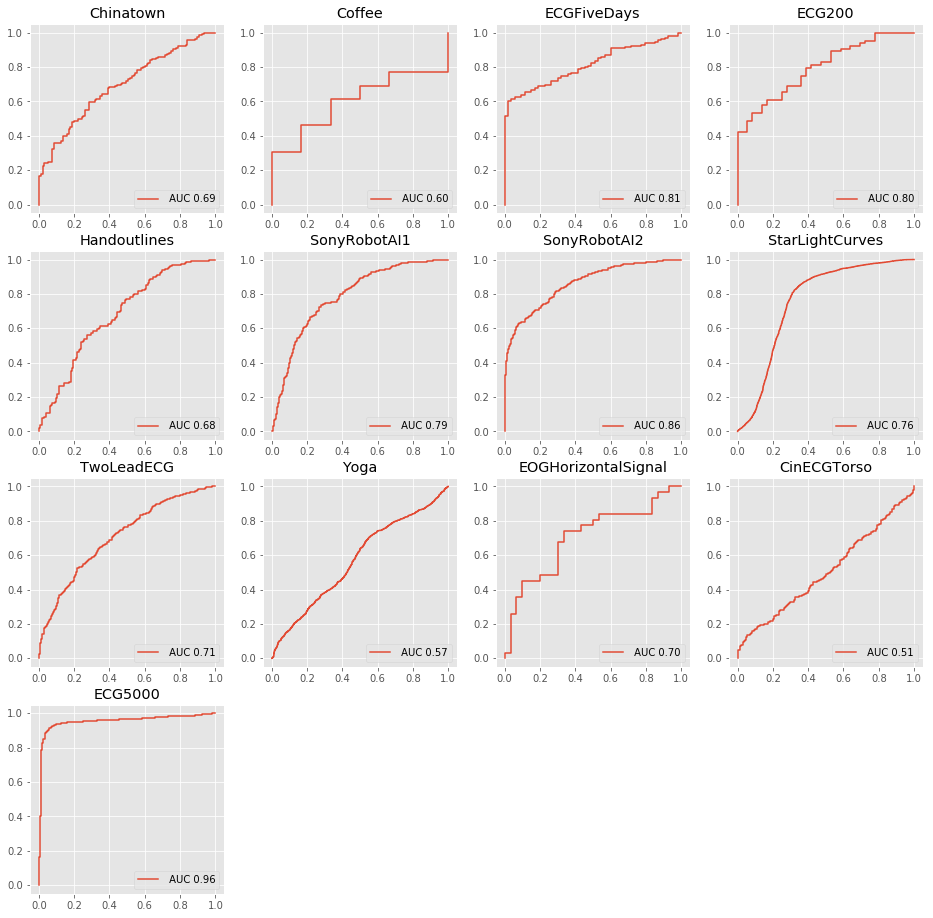

In [5]:

plt.figure(figsize=(16,16))
plt.subplot(441)
plotroc(y1_test,result_FPCA[0][0])
plt.title('Chinatown')
plt.subplot(442)
plotroc(y2_test,result_FPCA[1][0])
plt.title('Coffee')
plt.subplot(443)
plotroc(y3_test,result_FPCA[2][0])
plt.title('ECGFiveDays')
plt.subplot(444)
plotroc(y4_test,result_FPCA[3][0])
plt.title('ECG200')
plt.subplot(445)
plotroc(y5_test,result_FPCA[4][0])
plt.title('Handoutlines')
plt.subplot(446)
plotroc(y6_test,result_FPCA[5][0])
plt.title('SonyRobotAI1')
plt.subplot(447)
plotroc(y7_test,result_FPCA[6][0])
plt.title('SonyRobotAI2')
plt.subplot(448)
plotroc(y8_test,result_FPCA[7][0])
plt.title('StarLightCurves')
plt.subplot(449)
plotroc(y9_test,result_FPCA[8][0])
plt.title('TwoLeadECG')
plt.subplot(4,4,10)
plotroc(y10_test,result_FPCA[9][0])
plt.title('Yoga')
plt.subplot(4,4,11)
plotroc(y11_test,result_FPCA[10][0])
plt.title('EOGHorizontalSignal')
plt.subplot(4,4,12)
plotroc(y12_test,result_FPCA[11][0])
plt.title('CinECGTorso')
plt.subplot(4,4,13)
plotroc(y13_test,result_FPCA[12][0])
plt.title('ECG5000')

# Local Outlier Factor

Text(0.5, 1.0, 'ECG5000')

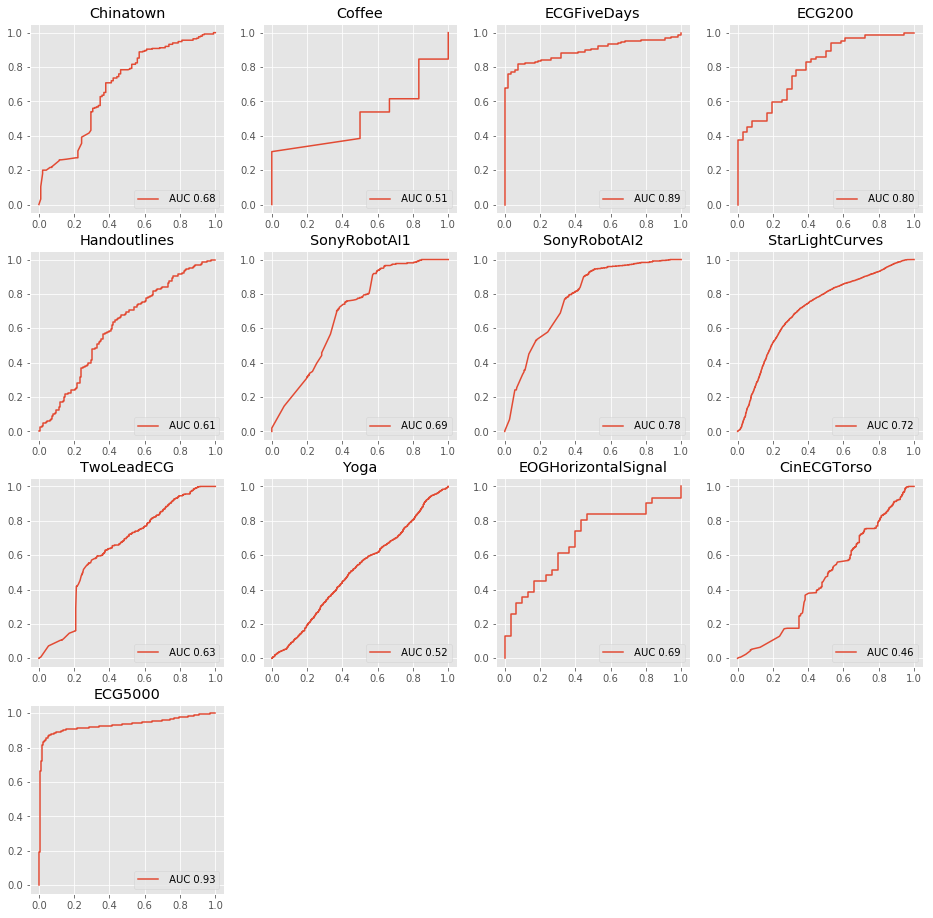

In [6]:

plt.figure(figsize=(16,16))
plt.subplot(441)
plotroc(y1_test,result_FPCA[0][1])
plt.title('Chinatown')
plt.subplot(442)
plotroc(y2_test,result_FPCA[1][1])
plt.title('Coffee')
plt.subplot(443)
plotroc(y3_test,result_FPCA[2][1])
plt.title('ECGFiveDays')
plt.subplot(444)
plotroc(y4_test,result_FPCA[3][1])
plt.title('ECG200')
plt.subplot(445)
plotroc(y5_test,result_FPCA[4][1])
plt.title('Handoutlines')
plt.subplot(446)
plotroc(y6_test,result_FPCA[5][1])
plt.title('SonyRobotAI1')
plt.subplot(447)
plotroc(y7_test,result_FPCA[6][1])
plt.title('SonyRobotAI2')
plt.subplot(448)
plotroc(y8_test,result_FPCA[7][1])
plt.title('StarLightCurves')
plt.subplot(449)
plotroc(y9_test,result_FPCA[8][1])
plt.title('TwoLeadECG')
plt.subplot(4,4,10)
plotroc(y10_test,result_FPCA[9][1])
plt.title('Yoga')
plt.subplot(4,4,11)
plotroc(y11_test,result_FPCA[10][1])
plt.title('EOGHorizontalSignal')
plt.subplot(4,4,12)
plotroc(y12_test,result_FPCA[11][1])
plt.title('CinECGTorso')
plt.subplot(4,4,13)
plotroc(y13_test,result_FPCA[12][1])
plt.title('ECG5000')


# One class SVM

Text(0.5, 1.0, 'ECG5000')

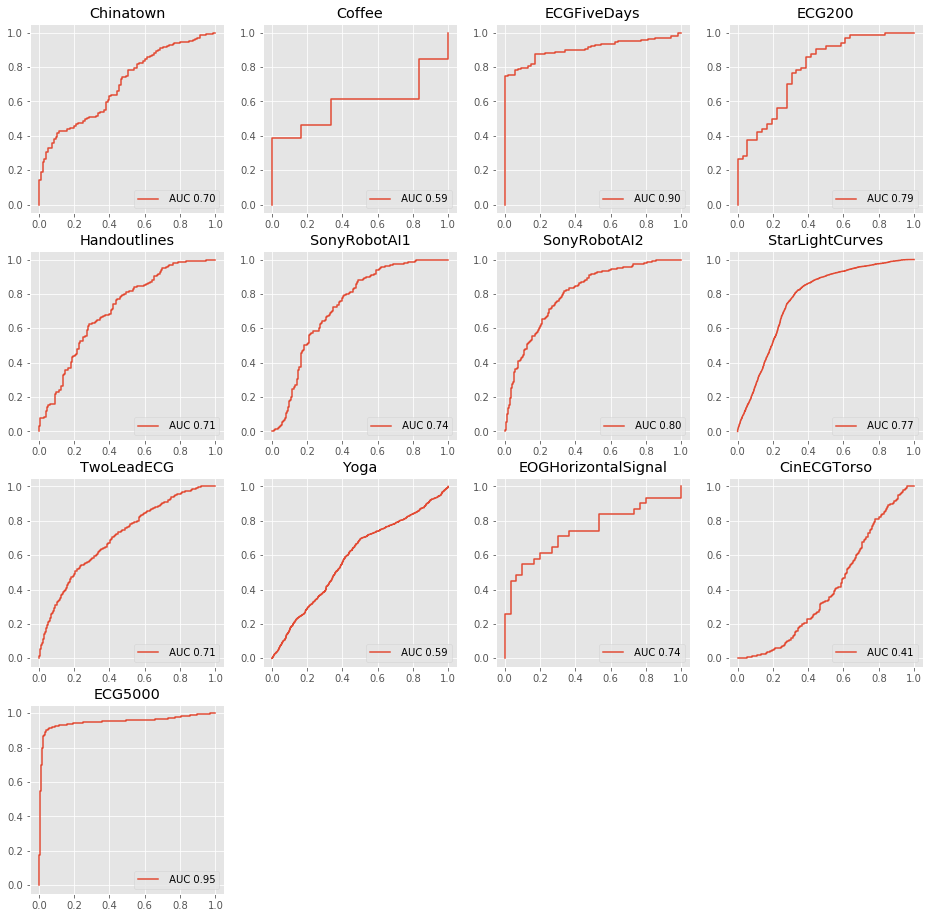

In [7]:


plt.figure(figsize=(16,16))
plt.subplot(441)
plotroc(y1_test,result_FPCA[0][2])
plt.title('Chinatown')
plt.subplot(442)
plotroc(y2_test,result_FPCA[1][2])
plt.title('Coffee')
plt.subplot(443)
plotroc(y3_test,result_FPCA[2][2])
plt.title('ECGFiveDays')
plt.subplot(444)
plotroc(y4_test,result_FPCA[3][2])
plt.title('ECG200')
plt.subplot(445)
plotroc(y5_test,result_FPCA[4][2])
plt.title('Handoutlines')
plt.subplot(446)
plotroc(y6_test,result_FPCA[5][2])
plt.title('SonyRobotAI1')
plt.subplot(447)
plotroc(y7_test,result_FPCA[6][2])
plt.title('SonyRobotAI2')
plt.subplot(448)
plotroc(y8_test,result_FPCA[7][2])
plt.title('StarLightCurves')
plt.subplot(449)
plotroc(y9_test,result_FPCA[8][2])
plt.title('TwoLeadECG')
plt.subplot(4,4,10)
plotroc(y10_test,result_FPCA[9][2])
plt.title('Yoga')
plt.subplot(4,4,11)
plotroc(y11_test,result_FPCA[10][2])
plt.title('EOGHorizontalSignal')
plt.subplot(4,4,12)
plotroc(y12_test,result_FPCA[11][2])
plt.title('CinECGTorso')
plt.subplot(4,4,13)
plotroc(y13_test,result_FPCA[12][2])
plt.title('ECG5000')

